In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
!pip install IPython 
from IPython.display import Image

In [6]:
# <사용한 데이터셋 링크>: https://archive.ics.uci.edu/dataset/242/energy+efficiency

# <알고리즘>: 랜덤포레스트, 선형회귀

# <해당 알고리즘 선정 이유>: 
# 두 알고리즘은 근본적인 특성에서 큰 차이를 보이기 때문에, 데이터의 패턴과 구조를 이해하기 위한 비교에 적합하다고 생각을 했다.
# 선형 회귀는 데이터를 선형적으로 설명하는 데 적합하고
# 랜덤포레스트는 비선형성을 포함한 더 복잡한 관계를 탐구하고, 더 높은 정확도를 기대할 수 있는 알고리즘이기 때문에 이 두 알고리즘을 선택했다.

# <정확도에 관하여>: 선형회귀보다 랜덤 포레스트 모델이 더 많은 특성을 처리하고, 예측 성능이 우수하다는 것을
# 알고 이 프로젝트를 진행했는데, 결과에서 증명이 되었다. 본인이 하고자 한 랜덤포레스트 모델이 선형회귀보다
# 더 적합하다는 것을 알 수 있었다. 그 결과는 밑에 모델 작동 결과 셀에서 작성하겠다.


In [ ]:
# <특징(feature)에 대한 설명>
# x1 - 상대적 밀도 (Compactness)
# x2 - 표면적 (Total_Surface)
# x3 - 벽의 면적 (Wall_Surface)
# x4 - 지붕 면적 (Roof_Surface)
# x5 - 바닥 면적(Floor_Surface)  <- Feature Engineering으로 만들어진 변수
# x6 - 전체 높이 (Building_Height)
# x7 - 건물의 배치 방향 (Orientation)(동,서,남,북 중 어느 방향을 향하고 있는지)
# x8 - 유리 면적 (Window_Area)(건물의 총 창문 면적을 의미하며, 이는 건물의 외부 벽에서 창문이 차지하는 전체 면적을 나타냄)
# x9 - 유리 분포 (Window_Area_Distribution)(창문이 건물의 각 면(동, 서, 남, 북)에 어떻게 분포되어 있는지를 나타내는 변수)

# <목표변수(타겟)에 대한 설명>
# y1 - 난방부하 (난방에 필요한 공급 열량)
# y2 - 냉방부하 (실내 공기를 쾌적하게 유지하기 위해 단위 시간당 외부로 내보내야 하는 열량)

In [21]:
# 데이터 로드 및 확인
data = pd.read_csv('C:/Users/USER/OneDrive/Desktop/energyEfficiency_data.csv')

In [22]:
# 컬럼 이름 변경
data.rename(
    columns={
        'X1': 'Compactness',
        'X2': 'Total_Surface',
        'X3': 'Wall_Surface',
        'X4': 'Roof_Surface',
        'X5': 'Building_Height',
        'X6': 'Orientation',
        'X7': 'Window_Area',
        'X8': 'Window_Area_Distribution',
        'Y1': 'Heating_Load',
        'Y2': 'Cooling_Load',
    },
    inplace=True,
)

In [ ]:
# Feature Engineering

In [23]:
data['Floor_Surface'] = data['Total_Surface'] - (data['Wall_Surface'] + data['Roof_Surface'])
features = [
    'Compactness',
    'Total_Surface',
    'Wall_Surface',
    'Roof_Surface',
    'Floor_Surface',
    'Building_Height',
    'Orientation',
    'Window_Area',
    'Window_Area_Distribution',
]
targets = ['Heating_Load', 'Cooling_Load']

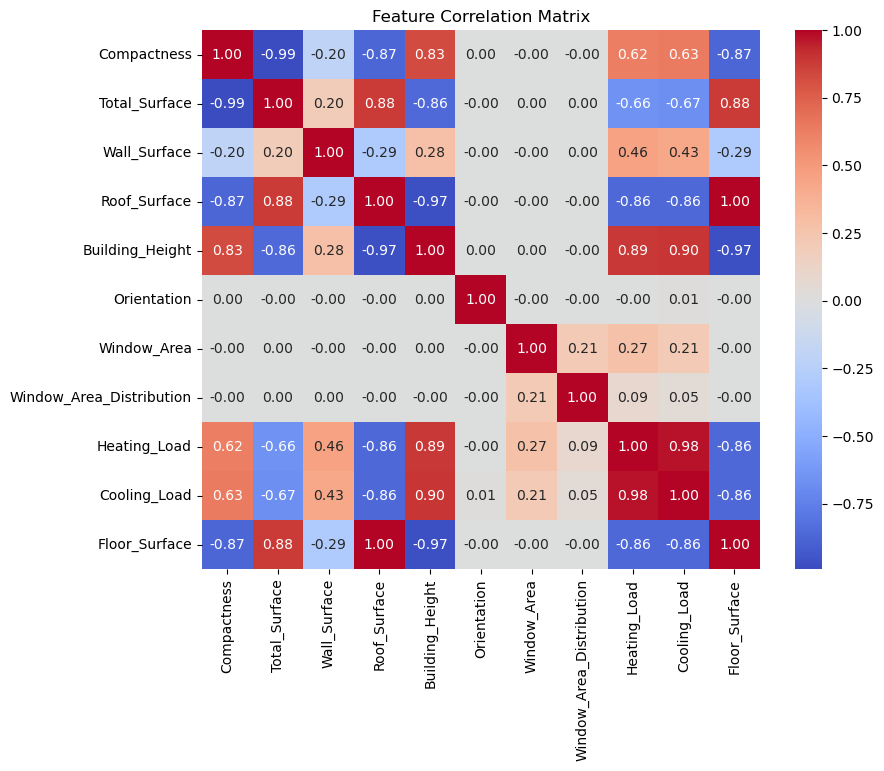

In [24]:
# 상관 행렬 시각화
plt.figure(figsize=(9, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [26]:
# 머신러닝 알고리즘 비교 함수 정의
def compare_models(dataset):
    # 랜덤 포레스트 및 선형 회귀 성능 비교
    results = {}
    x = dataset[features]
    y = dataset[targets]

    
    #train_test_split을 사용하여 학습 데이터(80%)와 테스트 데이터(20%)로 분리.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

    # 선형 회귀 모델
    #LinearRegression을 사용하여 선형 회귀 모델을 생성하고, 학습 데이터(x_train, y_train)로 모델을 학습시킨다.
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    linear_train_score = round(linear_model.score(x_train, y_train), 3)
    linear_test_score = round(linear_model.score(x_test, y_test), 3)
    linear_importance = pd.DataFrame(
        {'Feature': x.columns, 'Importance': linear_model.coef_[0]}
    )
    
    # ㄴ데이터와 테스트 데이터에 대한 점수를 계산하여 모델의 설명력을 평가한다. (여기서 score는 R²값을 반환한다.)
    # ㄴlinear_model.coef_을 통해 모델에서 각 특성(feature)의 중요도를 추출한다.
    

    # 랜덤 포레스트 모델
    # RandomForestRegressor를 사용하여 랜덤 포레스트 모델을 생성하고 학습시킨다.
    # 학습 데이터와 테스트 데이터에 대해 점수를 계산한다.
    # feature_importances_를 사용하여 각 특성의 중요도를 추출한다.
    
    forest_model = RandomForestRegressor(max_depth=6, random_state=55)
    forest_model.fit(x_train, y_train)
    forest_train_score = round(forest_model.score(x_train, y_train), 3)
    forest_test_score = round(forest_model.score(x_test, y_test), 3)
    forest_importance = pd.DataFrame(
        {'Feature': x.columns, 'Importance': forest_model.feature_importances_}
    )

    
    # 결과 저장
    results['Linear Regression'] = {
        'Train Score': linear_train_score,
        'Test Score': linear_test_score,
        'Importance': linear_importance,
    }
    results['Random Forest'] = {
        'Train Score': forest_train_score,
        'Test Score': forest_test_score,
        'Importance': forest_importance,
    }

    return results

In [ ]:
# <매개변수 선택 근거>:

# [선형회귀]:
# 특별한 하이퍼파라미터가 필요하지 않으며, 데이터를 정규화하여 학습 속도와 정확도를 개선

# [랜덤 포레스트]:
# max_depth=6: 모델 복잡도를 제한하여 과적합을 방지하고, 일반화 성능을 개선.
# random_state=55: 실험 재현성을 위해 설정.

In [27]:
data = data.dropna()
model_results = compare_models(data)

# 결과 출력
for model_name, metrics in model_results.items():
    print(f"{model_name} Results:")
    print(f"Train Score: {metrics['Train Score']}")
    print(f"Test Score: {metrics['Test Score']}")
    print(f"Feature Importance:\n{metrics['Importance']}")
    print("\n")

Linear Regression Results:
Train Score: 0.899
Test Score: 0.911
Feature Importance:
                    Feature    Importance
0               Compactness -6.521996e+01
1             Total_Surface  5.226720e+11
2              Wall_Surface -5.226720e+11
3              Roof_Surface -1.219066e+10
4             Floor_Surface -1.033153e+12
5           Building_Height  3.952137e+00
6               Orientation  1.467413e-02
7               Window_Area  2.035497e+01
8  Window_Area_Distribution  2.301783e-01


Random Forest Results:
Train Score: 0.985
Test Score: 0.985
Feature Importance:
                    Feature  Importance
0               Compactness    0.295491
1             Total_Surface    0.250677
2              Wall_Surface    0.044696
3              Roof_Surface    0.089355
4             Floor_Surface    0.065052
5           Building_Height    0.177126
6               Orientation    0.001594
7               Window_Area    0.065141
8  Window_Area_Distribution    0.010869




In [ ]:
#<결과 분석>
# Linear Regression (선형 회귀)

# Train Score (학습 데이터 정확도): 0.899
# Test Score (테스트 데이터 정확도): 0.911
# 테스트 정확도가 학습 정확도보다 약간 더 높아, 과적합(Overfitting) 문제는 없으며, 비교적 안정적인 성능을 보여줍니다.
# 하지만 중요한 변수로 판단된 Total_Surface, Wall_Surface, Floor_Surface의 회귀 계수가 비정상적으로 크거나 음수/양수로 극단적입니다.
# 결론: 모델의 테스트 정확도가 91.1%로 준수하지만, 변수 중요도는 신뢰하기 어렵습니다.

#<결과 분석>
# Random Forest (랜덤 포레스트)
# Train Score (학습 데이터 정확도): 0.985
# Test Score (테스트 데이터 정확도): 0.985
# 해석:
# 학습 정확도와 테스트 정확도가 거의 동일하며 매우 높은 점수를 기록했습니다. 
# 변수 중요도에서 Compactness와 Total_Surface가 가장 중요한 영향을 미치는 변수로 나타났습니다.
# 결론: 랜덤 포레스트 모델은 높은 정확도(98.5%)를 유지하면서 변수 중요도도 신뢰할 수 있습니다.

# 정확도 관점에서 랜덤 포레스트 모델이 더 나은 결과를 제공합니다

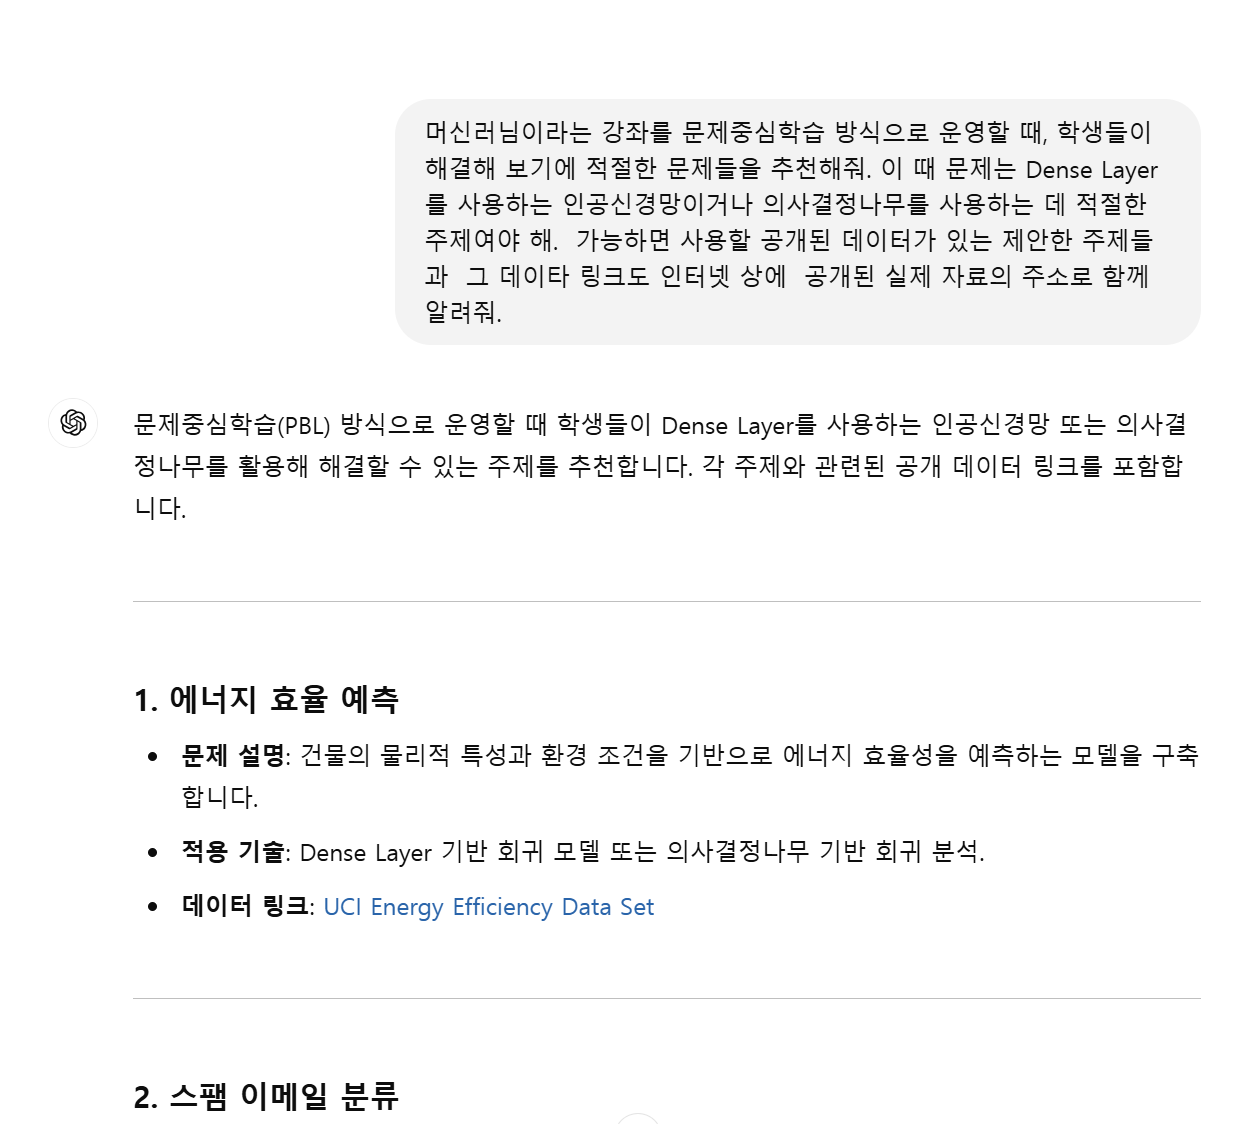

In [37]:
# 주제 주천-> Chat GPT 이용
Image("C:/Users/USER/OneDrive/Desktop/주제추천.png")

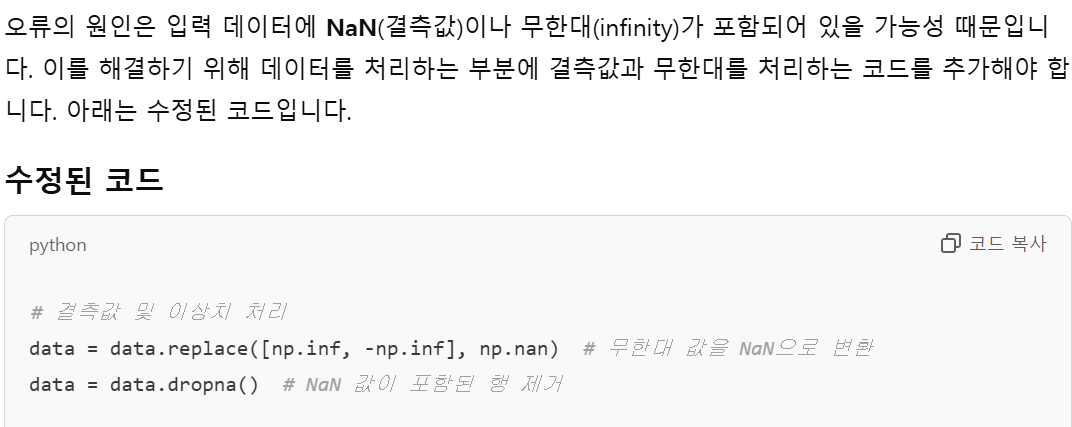

In [31]:
# 오류 발생-> Chat GPT로 해결
Image("C:/Users/USER/OneDrive/Desktop/error.png")

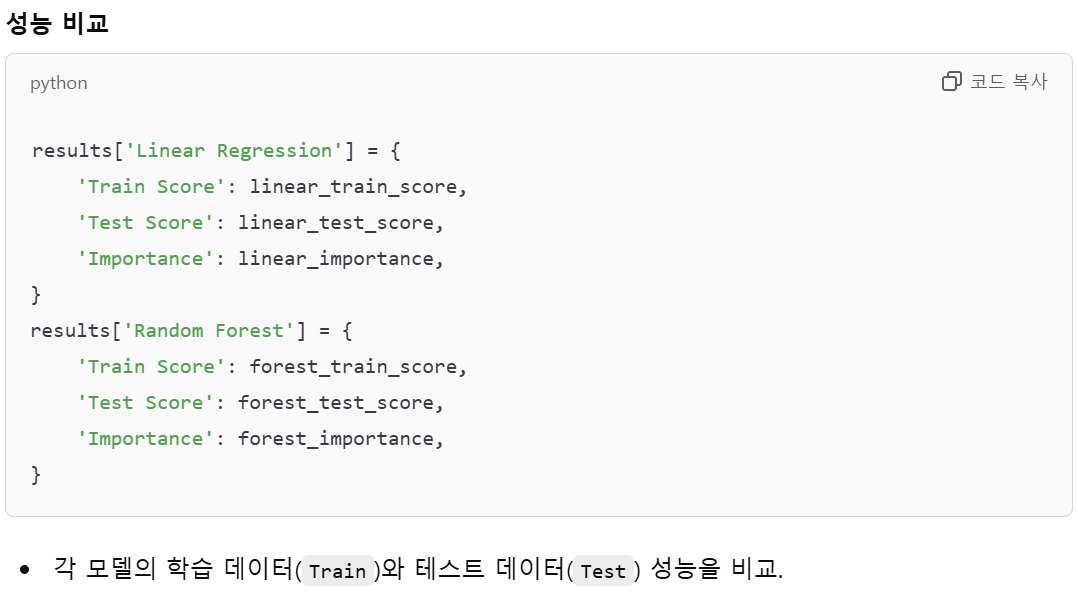

In [32]:
# 성능 비교하기 Chat-GPT code
Image("C:/Users/USER/OneDrive/Desktop/gpt도움.png")

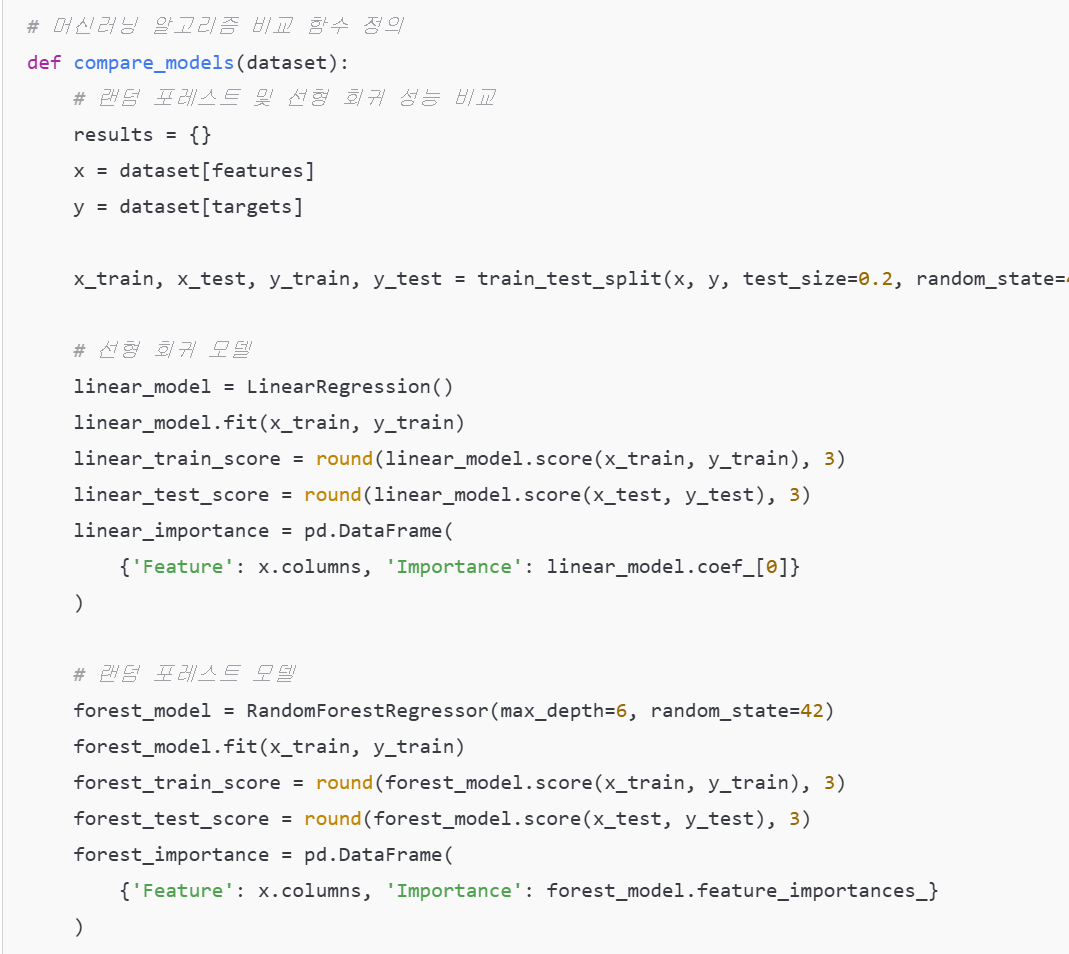

In [35]:
# 알고리즘 code 작성할 때 Chat-GPT의 도움을 받았습니다
Image("C:/Users/USER/OneDrive/Desktop/알고리즘gptcode.png")